<a href="https://colab.research.google.com/github/YonDraco/learn-pyimagesearch/blob/master/4_pytorch_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

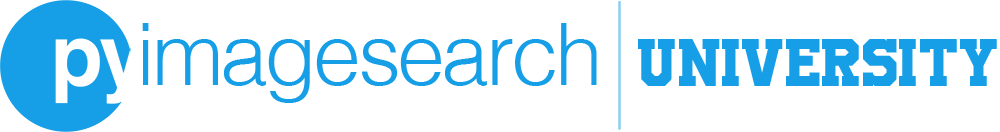

# PyTorch image classification with pre-trained networks
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch University](https://pyimg.co/university)** Jupyter Notebooks!

This notebook is associated with the [PyTorch image classification with pre-trained networks](https://www.pyimagesearch.com/2021/07/26/pytorch-image-classification-with-pre-trained-networks/) blog post published on 2021-07-26.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch University Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch University at https://pyimg.co/university today.*

### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/pytorch-image-classification/pytorch-image-classification.zip
!unzip -qq pytorch-image-classification.zip
%cd pytorch-image-classification

--2021-08-25 19:24:54--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/pytorch-image-classification/pytorch-image-classification.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.144.2
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.144.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2350600 (2.2M) [application/zip]
Saving to: ‘pytorch-image-classification.zip’

pytorch-image-class 100%[===================>]   2.24M  3.95MB/s    in 0.6s    

2021-08-25 19:24:55 (3.95 MB/s) - ‘pytorch-image-classification.zip’ saved [2350600/2350600]

/content/pytorch-image-classification


## Blog Post Code

### Import Packages

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
from torchvision import models
import numpy as np
import argparse
import torch
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Creating our configuration file

In [4]:
class Config:
    # specify image dimension
    IMAGE_SIZE = 224

    # specify ImageNet mean and standard deviation
    MEAN = [0.485, 0.456, 0.406]
    STD = [0.229, 0.224, 0.225]

    # determine the device we will be using for inference
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

    # specify path to the ImageNet labels
    IN_LABELS = "ilsvrc2012_wordnet_lemmas.txt"

# initialize a config object
config = Config()

### Implementing our image classification script

In [5]:
def preprocess_image(image):
	# swap the color channels from BGR to RGB, resize it, and scale
	# the pixel values to [0, 1] range
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (config.IMAGE_SIZE, config.IMAGE_SIZE))
	image = image.astype("float32") / 255.0

	# subtract ImageNet mean, divide by ImageNet standard deviation,
	# set "channels first" ordering, and add a batch dimension
	image -= config.MEAN
	image /= config.STD
	image = np.transpose(image, (2, 0, 1))
	image = np.expand_dims(image, 0)

	# return the preprocessed image
	return image

In [6]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to the input image")
#ap.add_argument("-m", "--model", type=str, default="vgg16",
#	choices=["vgg16", "vgg19", "inception", "densenet", "resnet"],
#	help="name of pre-trained network to use")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "images/boat.png",
	"model": "vgg16"
}

In [7]:
# define a dictionary that maps model names to their classes
# inside torchvision
MODELS = {
	"vgg16": models.vgg16(pretrained=True),
	"vgg19": models.vgg19(pretrained=True),
	"inception": models.inception_v3(pretrained=True),
	"densenet": models.densenet121(pretrained=True),
	"resnet": models.resnet50(pretrained=True)
}

# load our the network weights from disk, flash it to the current
# device, and set it to evaluation mode
print("[INFO] loading {}...".format(args["model"]))
model = MODELS[args["model"]].to(config.DEVICE)
model.eval()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

[INFO] loading vgg16...


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
# load the image from disk, clone it (so we can draw on it later),
# and preprocess it
print("[INFO] loading image...")
image = cv2.imread(args["image"])
orig = image.copy()
image = preprocess_image(image)

# convert the preprocessed image to a torch tensor and flash it to
# the current device
image = torch.from_numpy(image)
image = image.to(config.DEVICE)

# load the preprocessed the ImageNet labels
print("[INFO] loading ImageNet labels...")
imagenetLabels = dict(enumerate(open(config.IN_LABELS)))

[INFO] loading image...
[INFO] loading ImageNet labels...


[INFO] classifying image with 'vgg16'...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


0. wreck: 99.99%
1. seashore, coast, seacoast, sea-coast: 0.01%
2. pirate, pirate_ship: 0.00%
3. breakwater, groin, groyne, mole, bulwark, seawall, jetty: 0.00%
4. sea_lion: 0.00%


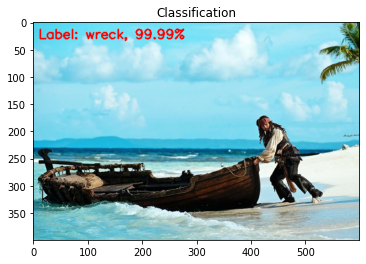

In [9]:
# classify the image and extract the predictions
print("[INFO] classifying image with '{}'...".format(args["model"]))
logits = model(image)
probabilities = torch.nn.Softmax(dim=-1)(logits)
sortedProba = torch.argsort(probabilities, dim=-1, descending=True)

# loop over the predictions and display the rank-5 predictions and
# corresponding probabilities to our terminal
for (i, idx) in enumerate(sortedProba[0, :5]):
	print("{}. {}: {:.2f}%".format
		(i, imagenetLabels[idx.item()].strip(),
		probabilities[0, idx.item()] * 100))

# draw the top prediction on the image and display the image to
# our screen
(label, prob) = (imagenetLabels[probabilities.argmax().item()],
	probabilities.max().item())
cv2.putText(orig, "Label: {}, {:.2f}%".format(label.strip(), prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
plt_imshow("Classification", orig)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*PyTorch image classification with pre-trained networks*](https://www.pyimagesearch.com/2021/07/26/pytorch-image-classification-with-pre-trained-networks/) published on 2021-07-26.

# Code License Agreement
```
Copyright (c) 2021 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```